In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from confidence_monai import UltrasoundConfidenceMap

from denoiser import gaussian_filter, anisotropic_diffusion, anisotropic_diffusion_2

out_dir = "31052023_out/"
data_dir = "31052023_data/"
os.makedirs(out_dir, exist_ok=True)

DENOISE = "none" # "none", "gaussian", "anisotropic", "anisotropic_2"

In [2]:
intersect_118 = np.array(Image.open(os.path.join(data_dir, "overlap", "img_slice_118_intersection.png"))).astype(np.float32)
intersect_500_118 = np.array(Image.open(os.path.join(data_dir, "overlap", "img_slice_500_intersection_with_118.png"))).astype(np.float32)
intersect_500_836 = np.array(Image.open(os.path.join(data_dir, "overlap", "img_slice_500_intersection_with_836.png"))).astype(np.float32)
intersect_836 = np.array(Image.open(os.path.join(data_dir, "overlap", "img_slice_836_intersection.png"))).astype(np.float32)

slice_118 = np.array(Image.open(os.path.join(data_dir, "img_slice_118.png"))).astype(np.float32)[..., 0]
slice_500 = np.array(Image.open(os.path.join(data_dir, "img_slice_500.png"))).astype(np.float32)[..., 0]
slice_836 = np.array(Image.open(os.path.join(data_dir, "img_slice_836.png"))).astype(np.float32)[..., 0]

if DENOISE == "gaussian":

    slice_118 = slice_118.astype(np.float64) / 255
    slice_500 = slice_500.astype(np.float64) / 255
    slice_836 = slice_836.astype(np.float64) / 255

    slice_118 = gaussian_filter(slice_118)
    slice_500 = gaussian_filter(slice_500)
    slice_836 = gaussian_filter(slice_836)

    slice_118 = (slice_118 * 255).astype(np.float32)
    slice_500 = (slice_500 * 255).astype(np.float32)
    slice_836 = (slice_836 * 255).astype(np.float32)

elif DENOISE == "anisotropic":

    slice_118 = slice_118.astype(np.float64) / 255
    slice_500 = slice_500.astype(np.float64) / 255
    slice_836 = slice_836.astype(np.float64) / 255

    slice_118 = anisotropic_diffusion(slice_118)
    slice_500 = anisotropic_diffusion(slice_500)
    slice_836 = anisotropic_diffusion(slice_836)

    slice_118 = (slice_118 * 255).astype(np.float32)
    slice_500 = (slice_500 * 255).astype(np.float32)
    slice_836 = (slice_836 * 255).astype(np.float32)

elif DENOISE == "anisotropic_2":

    slice_118 = anisotropic_diffusion_2(slice_118)
    slice_500 = anisotropic_diffusion_2(slice_500)
    slice_836 = anisotropic_diffusion_2(slice_836)

elif DENOISE == "none":
    pass

else:
    raise ValueError("Unknown denoising method")

label_118 = np.array(Image.open(os.path.join(data_dir, "label_slice_118.png"))).astype(np.float32)[..., 0]
label_500 = np.array(Image.open(os.path.join(data_dir, "label_slice_500.png"))).astype(np.float32)[..., 0]
label_836 = np.array(Image.open(os.path.join(data_dir, "label_slice_836.png"))).astype(np.float32)[..., 0]

In [3]:
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="all", solve_mode="cg")
confmap_all_118 = cm(slice_118)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mid", solve_mode="cg")
confmap_mid_118 = cm(slice_118)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="min", solve_mode="cg")
confmap_min_118 = cm(slice_118)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mask", solve_mode="cg")
confmap_mask_118 = cm(slice_118, sink_mask=label_118)

cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="all", solve_mode="cg")
confmap_all_500 = cm(slice_500)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mid", solve_mode="cg")
confmap_mid_500 = cm(slice_500)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="min", solve_mode="cg")
confmap_min_500 = cm(slice_500)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mask", solve_mode="cg")
confmap_mask_500 = cm(slice_500, sink_mask=label_500)

cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="all", solve_mode="cg")
confmap_all_836 = cm(slice_836)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mid", solve_mode="cg")
confmap_mid_836 = cm(slice_836)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="min", solve_mode="cg")
confmap_min_836 = cm(slice_836)
cm = UltrasoundConfidenceMap(alpha=2.0, beta=90.0, gamma=0.03, sink_mode="mask", solve_mode="cg")
confmap_mask_836 = cm(slice_836, sink_mask=label_836)

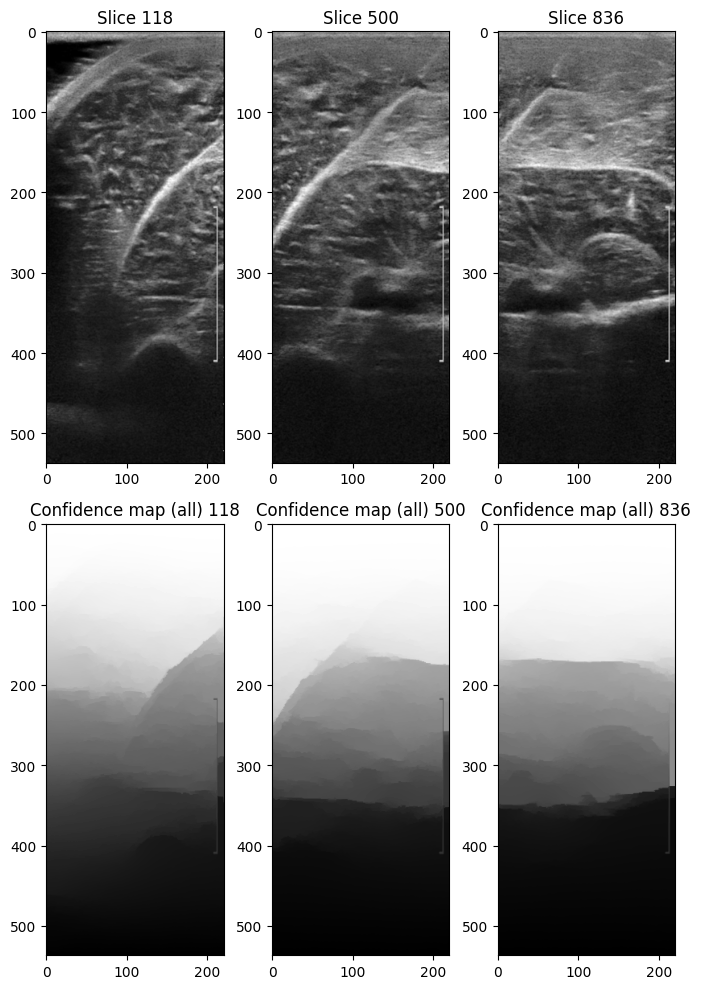

In [4]:
plt.figure(figsize=(7, 10))

plt.subplot(2, 3, 1)
plt.imshow(slice_118, cmap="gray")
plt.title("Slice 118")
plt.subplot(2, 3, 2)
plt.imshow(slice_500, cmap="gray")
plt.title("Slice 500")
plt.subplot(2, 3, 3)
plt.imshow(slice_836, cmap="gray")
plt.title("Slice 836")
plt.subplot(2, 3, 4)
plt.imshow(confmap_all_118, cmap="gray")
plt.title("Confidence map (all) 118")
plt.subplot(2, 3, 5)
plt.imshow(confmap_all_500, cmap="gray")
plt.title("Confidence map (all) 500")
plt.subplot(2, 3, 6)
plt.imshow(confmap_all_836, cmap="gray")
plt.title("Confidence map (all) 836")

plt.tight_layout()
plt.savefig(os.path.join(out_dir, DENOISE + "_all_confidence_maps.png"))

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(slice_118, cmap="gray")
plt.title("Original image")
plt.subplot(1, 5, 2)
plt.imshow(confmap_all_118, cmap="gray")
plt.title("Confidence map (all)")
plt.subplot(1, 5, 3)
plt.imshow(confmap_mid_118, cmap="gray")
plt.title("Confidence map (mid)")
plt.subplot(1, 5, 4)
plt.imshow(confmap_min_118, cmap="gray")
plt.title("Confidence map (min)")
plt.subplot(1, 5, 5)
plt.imshow(confmap_mask_118, cmap="gray")
plt.title("Confidence map (mask)")
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(slice_500, cmap="gray")
plt.title("Original image")
plt.subplot(1, 5, 2)
plt.imshow(confmap_all_500, cmap="gray")
plt.title("Confidence map (all)")
plt.subplot(1, 5, 3)
plt.imshow(confmap_mid_500, cmap="gray")
plt.title("Confidence map (mid)")
plt.subplot(1, 5, 4)
plt.imshow(confmap_min_500, cmap="gray")
plt.title("Confidence map (min)")
plt.subplot(1, 5, 5)
plt.imshow(confmap_mask_500, cmap="gray")
plt.title("Confidence map (mask)")
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(slice_836, cmap="gray")
plt.title("Original image")
plt.subplot(1, 5, 2)
plt.imshow(confmap_all_836, cmap="gray")
plt.title("Confidence map (all)")
plt.subplot(1, 5, 3)
plt.imshow(confmap_mid_836, cmap="gray")
plt.title("Confidence map (mid)")
plt.subplot(1, 5, 4)
plt.imshow(confmap_min_836, cmap="gray")
plt.title("Confidence map (min)")
plt.subplot(1, 5, 5)
plt.imshow(confmap_mask_836, cmap="gray")
plt.title("Confidence map (mask)")
plt.show()

In [ ]:
def add_sink_indicator(image, points):
    
    if len(points) == 1:
    # Add an arrow to the image to indicate the sink point
        point = points[0]
        arrow_length = min(image.shape[0], image.shape[1]) // 5
        if point[1] < image.shape[1] // 2:
            end_arrow = (point[1], point[0] - 7)
            start_arrow = (point[1], point[0] - arrow_length)
        else:
            end_arrow = (point[1], point[0] - 7)
            start_arrow = (point[1], point[0] - arrow_length)

        start_arrow = (int(start_arrow[0]), int(start_arrow[1]))
        end_arrow = (int(end_arrow[0]), int(end_arrow[1]))

        plt.arrow(start_arrow[0], start_arrow[1], end_arrow[0] - start_arrow[0], end_arrow[1] - start_arrow[1],
                    head_width=7, head_length=7, fc='r', ec='r')
        
    # Add red circles to the image to indicate the sink points
    for point in points:
        plt.plot(point[1], point[0] - 3, "ro", markersize=2)

def confmap_to_rgb(confmap):
    img = np.zeros((confmap.shape[0], confmap.shape[1], 3), dtype=np.uint8)
    img[..., 0] = (confmap / confmap.max()) * 255
    img[..., 1] = img[..., 0]
    img[..., 2] = img[..., 0]
    return img

In [ ]:
all_confmaps = {118: confmap_all_118, 500: confmap_all_500, 836: confmap_all_836}
mid_confmaps = {118: confmap_mid_118, 500: confmap_mid_500, 836: confmap_mid_836}
min_confmaps = {118: (confmap_min_118, slice_118), 500: (confmap_min_500, slice_500), 836: (confmap_min_836, slice_836)}
mask_confmaps = {118: (confmap_mask_118, label_118), 500: (confmap_mask_500, label_500), 836: (confmap_mask_836, label_836)}

In [ ]:
for slice, confmap in all_confmaps.items():
    img = confmap_to_rgb(confmap)
    plt.imshow(img)
    points = [(img.shape[0] - 1, i) for i in range(0, img.shape[1])]
    add_sink_indicator(img, points)
    
    # No frame no margin, plain image
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(os.path.join(out_dir, f"confmap_all_{slice}_with_indicators.png"), bbox_inches="tight", pad_inches=0)
    plt.close()

for slice, confmap in mid_confmaps.items():
    img = confmap_to_rgb(confmap)
    plt.imshow(img)
    points = [(img.shape[0] - 1, img.shape[1] // 2)]
    add_sink_indicator(img, points)

    # No frame no margin, plain image
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(os.path.join(out_dir, f"confmap_mid_{slice}_with_indicators.png"), bbox_inches="tight", pad_inches=0)
    plt.close()

for slice, (confmap, org_img) in min_confmaps.items():
    img = confmap_to_rgb(confmap)
    plt.imshow(img)
    points = [(img.shape[0] - 1, np.argmin(org_img[-1, :]))]
    add_sink_indicator(img, points)

    # No frame no margin, plain image
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(os.path.join(out_dir, f"confmap_min_{slice}_with_indicators.png"), bbox_inches="tight", pad_inches=0)
    plt.close()

for slice, (confmap, label) in mask_confmaps.items():
    img = confmap_to_rgb(confmap)

    img[label != 0, 0] = 255
    img[label != 0, 1] = 0
    img[label != 0, 2] = 0

    plt.imshow(img)

    # No frame no margin, plain image
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(os.path.join(out_dir, f"confmap_mask_{slice}_with_indicators.png"), bbox_inches="tight", pad_inches=0)
    plt.close()


In [ ]:
raw_confmaps_dir = os.path.join(out_dir, "raw_confmaps")
os.makedirs(raw_confmaps_dir, exist_ok=True)

for slice, confmap in all_confmaps.items():
    img = confmap_to_rgb(confmap)
    Image.fromarray(img).save(os.path.join(raw_confmaps_dir, f"confmap_all_{slice}.png"))

for slice, confmap in mid_confmaps.items():
    img = confmap_to_rgb(confmap)
    Image.fromarray(img).save(os.path.join(raw_confmaps_dir, f"confmap_mid_{slice}.png"))

for slice, (confmap, org_img) in min_confmaps.items():
    img = confmap_to_rgb(confmap)
    Image.fromarray(img).save(os.path.join(raw_confmaps_dir, f"confmap_min_{slice}.png"))

for slice, (confmap, label) in mask_confmaps.items():
    img = confmap_to_rgb(confmap)
    Image.fromarray(img).save(os.path.join(raw_confmaps_dir, f"confmap_mask_{slice}.png"))

In [ ]:
# Plot overlaps
plt.figure(figsize=(10, 30))
plt.subplot(2, 2, 1)
crop_idxs = np.where(intersect_118 != 0)
lims = [crop_idxs[0].min(), crop_idxs[0].max(), crop_idxs[1].min(), crop_idxs[1].max()]
crop_118_500 = slice_118[lims[0]:lims[1], lims[2]:lims[3]]
plt.imshow(crop_118_500, cmap="gray")
plt.title("Overlap between slice 118 and 500")
plt.subplot(2, 2, 2)
crop_idxs = np.where(intersect_500_118 != 0)
lims = [crop_idxs[0].min(), crop_idxs[0].max(), crop_idxs[1].min(), crop_idxs[1].max()]
crop_500_118 = slice_500[lims[0]:lims[1], lims[2]:lims[3]]
plt.imshow(crop_500_118, cmap="gray")
plt.title("Overlap between slice 500 and 118")
plt.subplot(2, 2, 3)
crop_idxs = np.where(intersect_500_836 != 0)
lims = [crop_idxs[0].min(), crop_idxs[0].max(), crop_idxs[1].min(), crop_idxs[1].max()]
crop_500_836 = slice_500[lims[0]:lims[1], lims[2]:lims[3]]
plt.imshow(crop_500_836, cmap="gray")
plt.title("Overlap between slice 500 and 836")
plt.subplot(2, 2, 4)
crop_idxs = np.where(intersect_836 != 0)
lims = [crop_idxs[0].min(), crop_idxs[0].max(), crop_idxs[1].min(), crop_idxs[1].max()]
crop_836 = slice_836[lims[0]:lims[1], lims[2]:lims[3]]
plt.imshow(crop_836, cmap="gray")
plt.title("Overlap between slice 836 and 500")
plt.show()

In [ ]:
# Calculate Mean squared error, mean squared standard deviation and structural similarity

from skimage.metrics import structural_similarity

In [ ]:
crop_idxs_118_500 = np.where(intersect_118 != 0)
lims_118_500 = [crop_idxs_118_500[0].min(), crop_idxs_118_500[0].max(), crop_idxs_118_500[1].min(), crop_idxs_118_500[1].max()]
crop_idxs_500_118 = np.where(intersect_500_118 != 0)
lims_500_118 = [crop_idxs_500_118[0].min(), crop_idxs_500_118[0].max(), crop_idxs_500_118[1].min(), crop_idxs_500_118[1].max()]
crop_idxs_500_836 = np.where(intersect_500_836 != 0)
lims_500_836 = [crop_idxs_500_836[0].min(), crop_idxs_500_836[0].max(), crop_idxs_500_836[1].min(), crop_idxs_500_836[1].max()]
crop_idxs_836_500 = np.where(intersect_836 != 0)
lims_836_500 = [crop_idxs_836_500[0].min(), crop_idxs_836_500[0].max(), crop_idxs_836_500[1].min(), crop_idxs_836_500[1].max()]

In [ ]:
def evaluate(confmaps, limss, denosing="None"):

    squared_diffs = []
    normalized_squared_diffs = []
    ssim = []
    crop_values = []

    plt.figure(figsize=(10, 5))

    for i in range(len(confmaps)):

        confmap1, confmap2 = confmaps[i]
        lims1, lims2 = limss[i]

        crop1 = confmap1[lims1[0]:lims1[1], lims1[2]:lims1[3]]
        crop2 = confmap2[lims2[0]:lims2[1], lims2[2]:lims2[3]]

        # mean = np.mean(np.concatenate((crop1.reshape(-1), crop2.reshape(-1))))
        # std = np.std(np.concatenate((crop1.reshape(-1), crop2.reshape(-1))))

        # crop1 = (crop1 - mean) / std
        # crop2 = (crop2 - mean) / std

        plt.subplot(1, len(confmaps) * 2, 2 * i + 1)
        plt.imshow(crop1, cmap="gray")
        plt.title(f"Confidence map {i + 1}")
        plt.subplot(1, len(confmaps) * 2, 2 * i + 2)
        plt.imshow(crop2, cmap="gray")
        plt.title(f"Confidence map {i + 2}")

        squared_diff = (crop1 - crop2) ** 2

        squared_diffs.append(squared_diff.reshape(-1))
        ssim.append(structural_similarity(crop1, crop2))
        crop_values.append(crop1.reshape(-1))
        crop_values.append(crop2.reshape(-1))

        n_crop1 = (crop1 - crop1.mean()) / crop1.std()
        n_crop2 = (crop2 - crop2.mean()) / crop2.std()

        normalized_squared_diff = (n_crop1 - n_crop2) ** 2
        normalized_squared_diffs.append(normalized_squared_diff.reshape(-1))


    squared_diffs = np.concatenate(squared_diffs)
    crop_values = np.concatenate(crop_values)
    normalized_squared_diffs = np.concatenate(normalized_squared_diffs)

    mse = np.mean(squared_diffs)
    n_mse = (np.mean(normalized_squared_diffs))
    ssim = np.mean(ssim)
    msv = (np.mean(crop_values), np.std(crop_values))

    print(f"MSE: {mse:0.4f}")
    print(f"RMSE: {np.sqrt(mse):0.4f}")
    print(f"NMSE: {n_mse:0.4f}")
    print(f"SSIM: {ssim:0.4f}")
    print(f"MSV: {msv[0]:0.4f} ± {msv[1]:0.4f}")

    plt.show()


In [ ]:
# for all
print("All")
evaluate([(confmap_all_118, confmap_all_500), (confmap_all_500, confmap_all_836)],
            [(lims_118_500, lims_500_118), (lims_500_836, lims_836_500)])

# for mid
print("Mid")
evaluate([(confmap_mid_118, confmap_mid_500), (confmap_mid_500, confmap_mid_836)],
            [(lims_118_500, lims_500_118), (lims_500_836, lims_836_500)])

# for min
print("Min")
evaluate([(confmap_min_118, confmap_min_500), (confmap_min_500, confmap_min_836)],
            [(lims_118_500, lims_500_118), (lims_500_836, lims_836_500)])

# for mask
print("Mask")
evaluate([(confmap_mask_118, confmap_mask_500), (confmap_mask_500, confmap_mask_836)],
            [(lims_118_500, lims_500_118), (lims_500_836, lims_836_500)])